# Thông tin đồ án

## Thành viên

|   MSSV   |      Họ tên     |   GitHub  |
|:--------:|:---------------:|:---------:|
| 18120120 | Trần Chí Hào    | haotrch   |
| 18120147 | Trần Quốc Thắng | tqthangbl |

## Link thùng chứa GitHub

[https://github.com/tqthangbl/P4DS-FinalProject](https://github.com/tqthangbl/P4DS-FinalProject)

## Môi trường code

- Code trên môi trường Linux
- Dùng phiên bản các package như trong file "min_ds-env.yml"

In [1]:
import sys
sys.executable

'/home/haoo/miniconda3/envs/min_ds-env/bin/python'

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Thu thập dữ liệu

**Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?**

Bộ dữ liệu mà nhóm sử dụng có tên là "Google Play Store Apps", được lấy từ [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps), chứa thông tin về hơn 10000 ứng dụng trên Google Play Store. Thời điểm bộ dữ liệu được đăng lên Kaggle là vào ngày 05/09/2018, lần cập nhật cuối là vào 03/02/2019.

Có 2 file dữ liệu:
1. `googleplaystore.csv`: Chứa các thông tin chi tiết về các ứng dụng thu thập được từ Google Play.
2. `googleplaystore_user_reviews`: Chứa thông tin về 100 đánh giá liên quan nhất cho mỗi ứng dụng thu thập được từ Google Play.

**Người ta có cho phép bạn dùng dữ liệu như này không? Ví dụ, bạn có thể xem thử license của dữ liệu là gì**


License của dữ liệu là Creative Commons Attribution 3.0 Unported, theo như được nói ở [đây](https://creativecommons.org/licenses/by/3.0/), người ta cho phép:

1. Copy và chia sẻ dữ liệu này dưới bất kì hình thức nào
2. Sử dụng bộ dữ liệu này để xây dựng bất cứ thứ gì, cho bất cứ mục đích nào, kể cả thương mại

**Người ta thu thập dữ liệu như thế nào?**

Dữ liệu được tác giả crawl từ Google Play Store.


# Khám phá dữ liệu (đan xen với tiền xử lý)

## File `googleplaystore.csv`

Ở đây nhóm khám phá dữ liệu trong file `googleplaystore.csv` trước. Dữ liệu đọc từ file sẽ lưu vào dataframe `app_df`.

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
app_df = pd.read_csv('Data/googleplaystore.csv')
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
def get_app_df_shape():
    app_num_rows, app_num_cols = app_df.shape
    print(f'[+] num_rows = {app_num_rows}')
    print(f'[+] num_cols = {app_num_cols}')
    
get_app_df_shape()

[+] num_rows = 10841
[+] num_cols = 13


Dữ liệu có 10841 dòng và 13 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [5]:
app_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8571,Interactive NPC DM Tool,FAMILY,2.8,5,629k,50+,Paid,$0.99,Everyone,Role Playing,"January 31, 2015",1.0.0,2.3.3 and up
2504,PulsePoint AED,MEDICAL,4.5,330,17M,"50,000+",Free,0,Everyone,Medical,"July 31, 2018",1.12,4.0.3 and up
764,Learn SQL,EDUCATION,4.7,19277,5.3M,"1,000,000+",Free,0,Everyone,Education,"December 25, 2017",3.4.2,4.0 and up
2126,Touch Racing 2 - Mini RC Race,FAMILY,4.1,41867,78M,"1,000,000+",Free,0,Everyone,Racing;Action & Adventure,"May 18, 2017",1.4.2.1,2.3.3 and up
2391,Complete Anatomy for Android,MEDICAL,4.1,90,21M,"1,000+",Free,0,Everyone,Medical,"July 11, 2018",1.0.0,7.0 and up


Theo như mô tả của tác giả, mỗi dòng trong dữ liệu chứa thông tin của 1 ứng dụng trên Play Store. Bằng việc quan sát ngẫu nhiên các dòng trong dữ liệu nhiều lần, có vẻ không có dòng nào mang ý nghĩa khác.

### Mỗi cột có ý nghĩa gì?

Theo mô tả dữ liệu, các cột có ý nghĩa như sau:
* **App**: Tên ứng dụng
* **Category**: Hạng mục chính mà ứng dụng thuộc về
* **Rating**: Mức đánh giá tổng thể của ứng dụng (tại thời điểm thu thập dữ liệu)
* **Reviews**: Số lượng người đánh giá ứng dụng (tại thời điểm thu thập dữ liệu)
* **Size**: Kích thước ứng dụng (tại thời điểm thu thập dữ liệu)
* **Installs**: Số lượng người tải xuống / cài đặt ứng dụng (tại thời điểm thu thập dữ liệu)
* **Type**: Kiểu ứng dụng miễn phí (Free) hay trả phí (Paid)
* **Price**: Số tiền trả phí của ứng dụng (tại thời điểm thu thập dữ liệu)
* **Content Rating**: Nhóm độ tuổi mà ứng dụng nhắm đến
* **Genres**: Các thể loại mà ứng dụng thuộc về (có thể bao gồm cả hạng mục chính)
* **Last Updated**: Ngày cuối cùng mà ứng dụng được cập nhật trên Store (tại thời điểm thu thập dữ liệu)
* **Current Ver**: Phiên bản hiện tại của ứng dụng có mặt trên Store (tại thời điểm thu thập dữ liệu)
* **Android Ver**: Phiên bản Android yêu cầu tối thiểu (tại thời điểm thu thập dữ liệu)

### Dữ liệu có các dòng bị lặp không?

Xét dữ liệu có tồn tại các dòng bị lặp hay không:

In [6]:
app_df.duplicated().sum() > 0

True

#### Tiền xử lý loại bỏ các dòng trùng lặp

Do dữ liệu tồn tại các dòng bị lặp, và tuy là Play Store cho phép 2 ứng dụng có thể trùng tên, nhưng rất khó để 2 ứng dụng có thể trùng toàn bộ thông tin trong 12 cột còn lại. Do đó những dòng bị lặp này là của cùng 1 ứng dụng, vì vậy cần phải loại bỏ chúng.

In [7]:
app_df = app_df.drop_duplicates()
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
get_app_df_shape()

[+] num_rows = 10358
[+] num_cols = 13


Số dòng của dữ liệu sau khi loại bỏ các dòng bị lặp, chỉ còn lại 10358 dòng.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Trước hết lấy ra `dtypes` của các cột, lưu vào series `col_dtypes`, và in ra để quan sát.

In [9]:
col_dtypes = app_df.dtypes
col_dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Cột `Rating` thể hiện đánh giá của người dùng cho ứng dụng, là 1 con số nên kiểu `float64` là hợp lý. Các cột còn lại đang có kiểu `object`. Kiểu `object` trong Pandas thường là chuỗi, nhưng cũng có thể là một đối tượng bất kỳ. Do đó, trong các cột thuộc kiểu `object`, có thể chứa những giá trị thuộc các kiểu dữ liệu khác nhau. Ta phải kiểm tra điều này bằng cách: với mỗi cột, áp dụng lệnh `type` lên từng phần tử trong cột đó để xem kiểu dữ liệu thật sự của chúng. Hàm `open_object_dtype` sẽ nhận input là 1 series `s`, trả về 1 set là tập các kiểu dữ liệu có trong series đó. Khi xem kết quả hàm `open_object_dtype` của từng cột, ta cũng xem luôn cột đó mang các giá trị phân biệt nào để xem có điều gì bất thường hay không.

In [10]:
def open_object_dtype(s):
    return set(s.apply(type).unique())

for col_name in col_dtypes.index:
    if col_dtypes[col_name] == 'object':
        print(f'[+] Column {col_name} dtypes: ')
        print(open_object_dtype(app_df[col_name]))
        print(app_df[col_name].unique())
        print()

[+] Column App dtypes: 
{<class 'str'>}
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

[+] Column Category dtypes: 
{<class 'str'>}
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

[+] Column Reviews dtypes: 
{<class 'str'>}
['159' '967' '87510' ... '603' '1195' '398307']

[+] Column Size dtypes: 
{<class 'str'>}
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M

#### Vấn đề cần tiền xử lý: Tồn tại dòng dữ liệu bị thiếu giá trị cột nào đó

Quan sát kết quả, khoan nói đến kiểu dữ liệu ở từng cột, ta thấy có một số điểm bất thường khi xem các giá trị phân biệt ở từng cột:
- Ở cột `Category`, có giá trị là `1.9`, có vẻ không phải là 1 giá trị phù hợp với ý nghĩa category
- Ở cột `Size`, có giá trị là `1,000+`, so với các giá trị còn lại trong cột này thường có format là 1 con số, theo sau đó là đơn vị (`k` hoặc `M`). Giá trị `1,000+` này có vẻ phù hợp với format của cột ngay sau đó là `Install` hơn.
- Ở cột `Installs`, có 1 giá trị là `Free`, không nói lên số lượt cài đặt của ứng dụng, giá trị này lại phù hợp với cột tiếp theo là `Type`, mang ý nghĩa ứng dụng đó thuộc loại miễn phí hay trả phí thì đúng hơn.

Từ đó ta đoán rằng có một dòng nào đó trong dữ liệu bị thiếu giá trị một số cột, do đó các giá trị của các cột còn lại bị dịch qua trái, nên giá trị ở một cột này lại nằm ở cột ngay trước đó. Đọc phần [Discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/164101) trên Kaggle cũng có người gặp vấn đề này, họ nói rằng dòng 10472 bị thiếu giá trị. Nhưng ta vẫn cần tiền xử lý để tìm và sửa các dòng như vậy, vì biết đâu còn nhiều dòng khác cũng bị tình trạng tương tự thì sao?

##### Tìm các dòng có giá trị một số cột bị thiếu

Ta sử dụng thư viện `csv` để đọc file `googleplaystore.csv`, dòng đầu của file sẽ là tên các cột. Với mỗi dòng tiếp theo, nếu số cột trong dòng đó khác với số lượng cột thì đưa chỉ số của dòng vào list `bad_index`. Sau khi chạy code, `bad_index` sẽ chứa các chỉ số dòng có các cột bị thiếu.

In [11]:
import csv

csv_file = open('Data/googleplaystore.csv')
csv_reader = csv.reader(csv_file, delimiter=',')
row_id = -1
col_count = 0
bad_index = []

for row in csv_reader:
    if row_id == -1:
        col_count = len(row)
        print(f"CSV file has {col_count} columns")
    else:
        if len(row) != col_count:
            print(f"Row id = {row_id} has {len(row)} columns")
            bad_index.append(row_id)
    row_id += 1

CSV file has 13 columns
Row id = 10472 has 12 columns


##### Thay thế các giá trị cột bị thiếu thành `NaN`

Xét dòng bị thiếu cột:

In [12]:
app_df.loc[bad_index]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Ở dòng 10472, giá trị cột `Category` bị thiếu, nên ta dịch các giá trị bắt đầu từ cột `Category` sang bên phải rồi điền giá trị cho cột `Category` là `NaN`

In [13]:
cols_list = app_df.columns.tolist()
i = len(cols_list) - 1
while i > 1:
    app_df.loc[bad_index, cols_list[i]] = app_df.loc[bad_index, cols_list[i - 1]]
    i -= 1
app_df.loc[bad_index, 'Category'] = np.nan

app_df.loc[bad_index]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


Dữ liệu đã được sửa xong, bây giờ ta loại bỏ dòng bị lặp sau khi chỉnh sửa dòng này.

In [14]:
app_df = app_df.drop_duplicates()
get_app_df_shape()

[+] num_rows = 10358
[+] num_cols = 13


#### Tiếp tục khám phá dữ liệu

Ta tiếp tục liệt kê các kiểu dữ liệu khác nhau ở các cột có dtype là `object`.

In [15]:
col_dtypes = app_df.dtypes

for col_name in col_dtypes.index:
    if col_dtypes[col_name] == 'object':
        print(f'[+] Column {col_name} dtypes: ')
        print(open_object_dtype(app_df[col_name]))
        print(app_df[col_name].unique())
        print()

[+] Column App dtypes: 
{<class 'str'>}
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

[+] Column Category dtypes: 
{<class 'str'>, <class 'float'>}
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' nan]

[+] Column Rating dtypes: 
{<class 'str'>, <class 'float'>}
[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.0 nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.0 2.6 3.0 1.9 2.5 2.8 2.7 1.0 2.9 2.3 2.2 1.

#### Đánh giá kiểu dữ liệu hiện tại của các cột

Các cột đã có kiểu dữ liệu hợp lý:
- Cột `App` là tên ứng dụng, để kiểu `str` là hợp lý.
- Cột `Category` thể hiện các danh mục mà ứng dụng thuộc về, để kiểu `str` là hợp lý, chỉ có giá trị `NaN` là `float`.
- Cột `Genres` thể hiện thể loại mà ứng dụng thuộc về, để kiểu `str` là hợp lý, chỉ có giá trị `NaN` là `float`.
- Cột `Last Updated` là thời điểm cập nhật gần nhất của ứng dụng trên Play Store, đang ở dạng `str`, cần chuyển về `datetime`.
- Cột `Current Ver` thể hiện phiên bản hiện tại ứng dụng trên Play Store, để kiểu `str` là hợp lý, chỉ có giá trị `NaN` là `float`.
- Cột `Android Ver` thể hiện phiên bản Android phù hợp để cài ứng dụng, để kiểu `str` là hợp lý, chỉ có giá trị `NaN` là `float`.

Các cột cần xử lý tiếp:
- Cột `Rating` đang có giá trị `'1.9'` cần chuyển về `float`.
- Cột `Reviews` là số lượt đánh giá cho ứng dụng, đang ở kiểu `str` và `float`, giá trị này luôn là số nguyên nên cần chuyển về `int`.
- Cột `Size` là kích thước của ứng dụng, đang có đơn vị là KB (kết thúc bằng `k`) hoặc MB (kết thúc bằng `M`), hoặc `'Varies with device'`. Ta sẽ chuyển các kích thước về `float` và thống nhất đơn vị là KB, riêng giá trị `'Varies with device'` được gán bằng `nan`, để cột `Size` được xét là một cột numerical.
- Cột `Installs` và `Content Rating` là cột categorical với các category có thứ tự. Ta sử dụng `pd.Categorical` để định nghĩa thứ tự cho các category này.
- Cột `Type` thể hiện ứng dụng trả phí hoặc miễn phí, nên là kiểu `str`, chỉ có giá trị `NaN` là `float`. Ta cũng cần xem xét điền vào giá trị hợp lí cho giá trị `NaN` dựa vào giá trị cột `Price`.
- Cột `Price` thể hiện giá của ứng dụng, đang là `str`, có dạng dấu `$` sau đó là giá tiền, ngoại trừ giá trị `0`. Cần bỏ dấu `$` và chuyển cột này về `float`.

#### Chuyển dtype của cột `Rating` sang float

In [16]:
app_df = app_df.astype({'Rating': float})

#### Chuyển dtype của cột `Reviews` sang int

In [17]:
app_df = app_df.astype({'Reviews': int})

#### Tiền xử lý cột `Size` và chuyển dtype của cột sang float

In [18]:
def to_kb(string):
    if string == 'Varies with device':
        return np.nan
    num = float(string[:-1])
    coef = 1 #Nếu chuỗi kết thúc bằng kí tự 'k', chỉ cần lấy phần số trong chuỗi
    if string[-1] == 'M':
        coef *= 1024 #Nếu chuỗi kết thúc bằng kí tự 'M', lấy phần số trong chuỗi nhân 1024
    return float(num * coef)

app_df['Size'] = app_df['Size'].apply(to_kb)
app_df['Size']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        NaN
10840    19456.0
Name: Size, Length: 10358, dtype: float64

#### Sử dụng `pd.Categorical` cho cột `Installs`

Quan sát các giá trị khác nhau trong cột `Installs`:

In [19]:
np.array(sorted(app_df['Installs'].unique()))

array(['0', '0+', '1+', '1,000+', '1,000,000+', '1,000,000,000+', '10+',
       '10,000+', '10,000,000+', '100+', '100,000+', '100,000,000+', '5+',
       '5,000+', '5,000,000+', '50+', '50,000+', '50,000,000+', '500+',
       '500,000+', '500,000,000+'], dtype='<U14')

Ta thấy rằng cột `Installs` thuộc loại cột categorical có thứ tự, nên ta sẽ định nghĩa thứ tự các giá trị này và áp dụng cho cột `Installs`.

In [20]:
installs_cate_list = ['0', '0+', '1+', '5+', '10+', '50+',
                     '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+',
                     '100,000,000+', '500,000,000+', '1,000,000,000+']
app_df['Installs'] = pd.Categorical(app_df['Installs'], categories=installs_cate_list, ordered=True)
app_df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10358, dtype: category
Categories (21, object): ['0' < '0+' < '1+' < '5+' ... '50,000,000+' < '100,000,000+' < '500,000,000+' < '1,000,000,000+']

#### Sử dụng `pd.Categorical` cho cột `Content Rating`

Quan sát các giá trị khác nhau trong cột `Content Rating`:

In [21]:
np.array(sorted(app_df['Content Rating'].unique()))

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype='<U15')

Tương tự cột `Installs`, ta thấy rằng cột `Content Rating` thuộc loại cột categorical có thứ tự, nên ta sẽ định nghĩa thứ tự các giá trị này và áp dụng cho cột `Content Rating`.

In [22]:
cr_cate_list = ['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+']
app_df['Content Rating'] = pd.Categorical(app_df['Content Rating'], categories=cr_cate_list, ordered=True)
app_df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10358, dtype: category
Categories (5, object): ['Everyone' < 'Everyone 10+' < 'Teen' < 'Mature 17+' < 'Adults only 18+']

#### Điền giá trị `nan` trong cột `Type`

Xét các dòng có giá trị `nan` tại cột `Type`:

In [23]:
index_check_row = app_df[app_df['Type'].isna()].index
app_df.loc[index_check_row]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Nhận xét từ mô tả dữ liệu, cột `Type` có giá trị là `'Free'` tương đương với cột `Price` có giá trị là `0`. Do đó ta sẽ điền vào giá trị `Free` vào vị trí chứa giá trị `nan` này.

In [24]:
app_df['Type'].fillna('Free', inplace=True)
app_df.loc[index_check_row]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,Free,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


#### Tiền xử lý cột `Price` và chuyển dtype sang float

Cột này đang có dtype là `str`, mỗi giá trị có 2 dạng:

1. Là `0`
2. Là dạng dấu `$`, phía sau đó là giá tiền

Do đó, loại bỏ dấu `$`, sau đó chuyển sang `float`.

In [25]:
app_df['Price'] = app_df['Price'].replace(r'\$', '', regex=True)
app_df = app_df.astype({'Price': float})
app_df['Price'].sample(5)

4751     0.0
10415    0.0
8786     0.0
9721     0.0
4163     0.0
Name: Price, dtype: float64

#### Làm rõ ý nghĩa cột `Type` và cột `Price`

Theo mô tả dữ liệu, cột `Type` và cột `Price` có ý nghĩa như sau:
* **Type**: Kiểu ứng dụng miễn phí (Free) hay trả phí (Paid)
* **Price**: Số tiền trả phí của ứng dụng (tại thời điểm thu thập dữ liệu)

Như vậy, ta cần kiểm tra cột `Type` có giá trị là `'Free'` tương đương với cột `Price` có giá trị là 0, cột `Type` có giá trị là `'Paid'` tương đương với cột `Price` có giá trị lớn hơn 0.

Kiểm tra các giá trị trong cột `Price` khi cột `Type` có giá trị là `'Free'`:

In [26]:
app_df[app_df['Type'] == 'Free']['Price'].unique()

array([0.])

Kiểm tra có bao nhiêu giá trị bé hơn hoặc bằng 0 trong cột `Price` khi cột `Type` có giá trị là `'Paid'`:

In [27]:
price_unique_array = app_df.loc[app_df['Type'] == 'Paid', 'Price']
(price_unique_array <= 0).sum()

0

Vậy dữ liệu trong cột `Type` và cột `Price` đã đúng theo mô tả dữ liệu.

#### Chuyển dtype của cột `Last Updated` sang datetime

In [28]:
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], format="%B %d, %Y")

#### Kiểu dữ liệu hiện tại của các cột dữ liệu

In [29]:
app_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                category
Type                      object
Price                    float64
Content Rating          category
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

#### Tiền xử lý trước khi xét phân bố giá trị trong các cột: Loại bỏ các dòng trùng lặp giá trị cột `App`

Trước khi xét đến phân bố giá trị của các cột, ta cần xem xét một vấn đề nữa như sau:\
Theo mô tả dữ liệu, cột `App` có tất cả 9660 giá trị khác nhau. Do đó ta muốn kiểm tra rằng liệu những dòng có tên ứng dụng trùng nhau có phải là các ứng dụng khác nhau hay không.\
Xét một số dòng có giá trị cột `App` trùng nhau (bằng cách sắp xếp các dòng tăng dần theo cột `App`, xem 60 dòng đầu của bảng sau khi sắp xếp):

In [30]:
app_df[app_df.duplicated(subset='App', keep=False)]\
.sort_values('App', ascending=True).head(60)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25600.0,"10,000,000+",Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25600.0,"10,000,000+",Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1675,8 Ball Pool,GAME,4.5,14198297,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,53248.0,"100,000,000+",Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15360.0,"1,000,000+",Free,0.0,Teen,Dating,2018-08-01,8.7.2,4.2 and up


Theo quan sát sơ bộ, các dòng trùng nhau tại giá trị cột `App` đều có các thông tin giống nhau ở nhiều cột khác, nhưng khác nhau tối thiểu tại giá trị ở cột `Reviews`, vậy ta sẽ xem rằng các dòng trùng này cùng thuộc một ứng dụng. Do đó với mỗi tên ứng dung, ta sẽ ưu tiên giữ lại dòng có giá trị ở cột `Last Updated` trễ nhất (vì ứng dụng được cập nhật lúc mới nhất), đồng thời có giá trị ở cột `Reviews` cao nhất (có lẽ càng nhiều reviews sẽ cho thấy rằng dòng dữ liệu được thu thập ở thời gian mới nhất), và loại bỏ các dòng còn lại.

In [31]:
app_df = app_df.sort_values(['App', 'Last Updated', 'Reviews'], ascending=[True, False, False])\
                .drop_duplicates(subset='App').sort_index()
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5734.4,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [32]:
get_app_df_shape()

[+] num_rows = 9660
[+] num_cols = 13


Sau khi loại bỏ các dòng ở bước trên, bảng `app_df` có 9660 dòng và 13 cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta có 5 cột `Rating`, `Reviews`, `Size`, `Price`, `Last Updated` thuộc nhóm các cột numerical (cột `Last Updated` đang có dtype là datetime nên xếp vào nhóm cột numerical luôn). Với mỗi cột ta sẽ tính tỉ lệ phần trăm giá trị thiếu thuộc [0, 100], min, max.

In [33]:
def missing_ratio(s):
    return s.isna().mean() * 100

app_nume_cols = ['Rating', 'Reviews', 'Size', 'Price', 'Last Updated']
app_nume_col_profiles_df = app_df[app_nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max])
app_nume_col_profiles_df

,Rating,Reviews,Size,Price,Last Updated
missing_ratio,15.144928,0.0,12.722567,0.0,0.0
min,1.000000,0.0,8.500000,0.0,2010-05-21 00:00:00
max,5.000000,78158306.0,102400.000000,400.0,2018-08-08 00:00:00


Các giá trị này không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 8 cột `App`, `Category`, `Installs`, `Type`, `Content Rating`, `Genres`, `Current Ver`, `Android Ver` thuộc nhóm các cột categorical. Với mỗi cột categorical ta sẽ tính tỉ lệ phần trăm giá trị thiếu thuộc [0, 100], số lượng giá trị khác nhau (không xét giá trị thiếu), danh sách các giá trị khác nhau (không xét giá trị thiếu).

In [34]:
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.dropna().unique()

app_cate_cols = ['App', 'Category', 'Installs', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
app_cate_col_profiles_df = app_df[app_cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
app_cate_col_profiles_df

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver
missing_ratio,0.0,0.010352,0.0,0.0,0.020704,0.010352,0.082816,0.020704
num_diff_vals,9660,33,21,2,5,118,2818,33
diff_vals,[Photo Editor & Candy Camera & Grid & ScrapBoo...,"[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...","['10,000+', '5,000,000+', '50,000,000+', '100,...","[Free, Paid]","['Everyone', 'Teen', 'Everyone 10+', 'Mature 1...","[Art & Design, Art & Design;Creativity, Auto &...","[1.0.0, 1.2.4, Varies with device, 1.1, 1.0, 6...","[4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and..."


Các giá trị này không có gì bất thường.

## File `googleplaystore_user_reviews.csv`

Dữ liệu đọc từ file sẽ lưu vào dataframe `review_df`.

### Đọc dữ liệu từ file csv vào dataframe

In [35]:
review_df = pd.read_csv('Data/googleplaystore_user_reviews.csv')
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [36]:
def get_review_df_shape():
    review_num_rows, review_num_cols = review_df.shape
    print(f'[+] num_rows = {review_num_rows}')
    print(f'[+] num_cols = {review_num_cols}')
    
get_review_df_shape()

[+] num_rows = 64295
[+] num_cols = 5


Dữ liệu có 64295 dòng và 5 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [37]:
review_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10827,BEYBLADE BURST app,Awesome game great idea.... would terrific u c...,Positive,0.233333,0.559524
59837,Hangouts,NaN,NaN,NaN,NaN
38823,Easy Installer - Apps On SD,It makes effect,Neutral,0.000000,0.000000
61583,"Hide App, Private Dating, Safe Chat - PrivacyH...",I subscribed 6 month app... It responding all....,Negative,-0.283333,0.716667
24607,"Cash, Inc. Money Clicker Game & Business Adven...",NaN,NaN,NaN,NaN


Theo như mô tả của tác giả, mỗi dòng trong dữ liệu chứa thông tin của một review cho một ứng dụng trên Play Store. Bằng việc quan sát ngẫu nhiên các dòng trong dữ liệu nhiều lần, có vẻ không có dòng nào mang ý nghĩa khác.

### Mỗi cột có ý nghĩa gì?

Theo mô tả dữ liệu, các cột có ý nghĩa như sau:
* **App**: Tên ứng dụng
* **Translated_Review**: Nội dung review (đã được tiền xử lý bằng cách dịch sang tiếng Anh)
* **Sentiment**: Cảm xúc của review: Positive, Negative, Neutral (đã được tiền xử lý)
* **Sentiment_Polarity**: Mức độ tích cực / tiêu cực của review (-1: cực kì negative, 0: neutral, 1: cực kì positive)
* **Sentiment_Subjectivity**: Mức độ chủ quan của review (0: rất khách quan, 1: rất chủ quan)

### Dữ liệu có các dòng bị lặp không?

#### Tiền xử lý: loại bỏ các dòng chứa giá trị `nan` tại cột 'Translated_Review`

Có thể thấy rằng dữ liệu tồn tại các dòng có các giá trị `nan` tại cột `Translated_Review`, dẫn đến các giá trị `nan` tại các cột `Sentiment`, `Sentiment_Polarity`, `Sentiment_Subjectivity`. Vì vậy ta sẽ loại bỏ các dòng này.

In [38]:
review_df = review_df.dropna(subset=['Translated_Review'])
get_review_df_shape()

[+] num_rows = 37427
[+] num_cols = 5


#### Xem xét các dòng bị lặp

Xét dữ liệu có tồn tại các dòng bị lặp hay không:

In [39]:
review_df.duplicated().sum() > 0

True

Vì ta không đủ cơ sở để xét xem rằng các review bị lặp có phải do cùng một người bình luận hay nhiều người bình luận hay không nên ta sẽ giữ nguyên các dòng bị lặp này.

#### Làm rõ về số lượng review của mỗi ứng dụng

Xét số lượng review tương ứng với mỗi ứng dụng hiện có trong dữ liệu:

In [40]:
review_df.value_counts('App')

App
Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Length: 865, dtype: int64

Theo mô tả dữ liệu, bảng dữ liệu chứa 100 review "liên quan nhất" đến ứng dụng. Tuy nhiên ta lại thấy có một số ứng dụng có nhiều hơn 100 review, một số ứng dụng có ít hơn 100 review. Có thể giải thích như sau:
- Trường hợp ứng dụng có nhiều hơn 100 review: Sau khi khám phá dữ liệu tại bảng `app_df`, có thể thấy rằng ban đầu bảng `app_df` chứa nhiều ứng dụng trùng nhau, có lẽ là việc thu thập bị trùng. Tương tự, bảng `review_df` cũng có thể thu thập trùng (một app thu thập review nhiều lần), dẫn đến việc ứng dụng có nhiều hơn 100 review trong bảng `review_df`.
- Trường hợp ứng dụng có ít hơn 100 review: Có thể ứng dụng đó trên thực tế có ít hơn 100 review, ngoài ra còn tồn tại những review có giá trị `nan` mà ta đã loại bỏ trước đó.

Ta sẽ để nguyên dữ liệu này để tiếp tục khám phá.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

#### Xem kiểu dữ liệu hiện tại của các cột

Xem các dtype hiện tại:

In [41]:
review_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

Ta tiếp tục liệt kê các kiểu dữ liệu khác nhau ở các cột có dtype là `object`.

In [42]:
col_dtypes = review_df.dtypes

for col_name in col_dtypes.index:
    if col_dtypes[col_name] == 'object':
        print(f'[+] Column {col_name} dtypes: ')
        print(open_object_dtype(review_df[col_name]))
        print()

[+] Column App dtypes: 
{<class 'str'>}

[+] Column Translated_Review dtypes: 
{<class 'str'>}

[+] Column Sentiment dtypes: 
{<class 'str'>}



#### Sử dụng `pd.Categorical` cho cột `Sentiment`

Quan sát các giá trị khác nhau trong cột `Sentiment`, ta thấy cột này có dạng cột categorical có các category có thứ tự: Negative < Neutral < Positive:

In [43]:
np.array(sorted(review_df['Sentiment'].unique()))

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

Định nghĩa thứ tự các giá trị này và áp dụng cho cột `Sentiment`:

In [44]:
pd.set_option('mode.chained_assignment', None)

senti_cate_list = ['Negative', 'Neutral', 'Positive']
review_df['Sentiment'] = pd.Categorical(review_df['Sentiment'], categories=senti_cate_list, ordered=True)

pd.set_option('mode.chained_assignment', 'warn')
review_df['Sentiment']

0        Positive
1        Positive
3        Positive
4        Positive
5        Positive
           ...   
64222    Positive
64223    Positive
64226    Negative
64227    Positive
64230    Negative
Name: Sentiment, Length: 37427, dtype: category
Categories (3, object): ['Negative' < 'Neutral' < 'Positive']

Khi áp dụng `pd.Categorical` cho cột `Sentiment`, ta nhận được cảnh báo `SettingWithCopyWarning`, tuy nhiên việc áp dụng `pd.Categorical` này vẫn thành công khi ta kiểm tra kiểu dữ liệu hiện tại của các cột ở bước tiếp theo. Vì vậy để không xuất hiện warning ở bước trên, ta sẽ tạm tắt cảnh báo bằng `pd.set_option('mode.chained_assignment', None)` trước khi thực hiện các câu lệnh, và sau đó bật cảnh báo trở lại bằng `pd.set_option('mode.chained_assignment', 'warn')`.

#### Kiểu dữ liệu hiện tại của các cột dữ liệu

In [45]:
review_df.dtypes

App                         object
Translated_Review           object
Sentiment                 category
Sentiment_Polarity         float64
Sentiment_Subjectivity     float64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta có 2 cột `Sentiment_Polarity` và `Sentiment_Subjectivity` thuộc nhóm các cột numerical. Với mỗi cột ta sẽ tính tỉ lệ phần trăm giá trị thiếu thuộc [0, 100], min, max.

In [46]:
review_nume_cols = ['Sentiment_Polarity', 'Sentiment_Subjectivity']
review_nume_col_profiles_df = review_df[review_nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max])
review_nume_col_profiles_df

,Sentiment_Polarity,Sentiment_Subjectivity
missing_ratio,0.0,0.0
min,-1.0,0.0
max,1.0,1.0


Các giá trị này không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 3 cột `App`, `Translated_Review`, `Sentiment` thuộc nhóm các cột categorical. Với mỗi cột categorical ta sẽ tính tỉ lệ phần trăm giá trị thiếu thuộc [0, 100], số lượng giá trị khác nhau (không xét giá trị thiếu), danh sách các giá trị khác nhau (không xét giá trị thiếu).

In [47]:
review_cate_cols = ['App', 'Translated_Review', 'Sentiment']
review_cate_col_profiles_df = review_df[review_cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
review_cate_col_profiles_df

,App,Translated_Review,Sentiment
missing_ratio,0.0,0.0,0.0
num_diff_vals,865,27994,3
diff_vals,"[10 Best Foods for You, 104 找工作 - 找工作 找打工 找兼職 ...",[I like eat delicious food. That's I'm cooking...,"['Positive', 'Neutral', 'Negative'] Categories..."


Các giá trị này không có gì bất thường.

# Đưa ra các câu hỏi có ý nghĩa cần trả lời, Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

## Câu hỏi 1: Với mỗi nhóm độ tuổi mà ứng dụng nhắm đến, đâu là 5 category có nhiều lượt tải về nhất? Cho ứng dụng minh hoạ với từng category?

### Mục đích câu hỏi

Trả lời được câu hỏi này sẽ giúp chúng ta biết được 5 category yêu thích của từng nhóm độ tuổi, do đó nếu như ta muốn xây dựng một ứng dụng nhắm đến một lứa tuổi nào đó thì sẽ biết được nên phát triển ý tưởng dựa trên category nào để có thể bắt kịp xu hướng của lứa tuổi đó và có tiềm năng nhận được nhiều lượt tải về, đồng thời quan sát tên ứng dụng minh họa sẽ biết được category đó thường sẽ có nội dung gì.

### Tiền xử lý

- Các ứng dụng không có chuyên mục (giá trị `NaN` ở cột `Category`) thì thay bằng chuyên mục `OTHER`

In [48]:
category_crating_df = app_df[['Category', 'Content Rating', 'Installs']].copy()
category_crating_df['Category'] = category_crating_df['Category'].fillna('OTHER')

- Cột `Installs` thể hiện số lượt tải ứng dụng, nhưng đang ở dạng cột mốc, vì vậy cần chuyển nó về dạng `int` bằng cách cộng 1 vào con số cột mốc, ví dụ `1,000+` sẽ thay thành `1001`

In [49]:
def change_installs_str_to_int(s):
    if s == '0':
        return 0
    return int(s[:-1].replace(',', '')) + 1

category_crating_df['Installs'] = category_crating_df['Installs'].apply(change_installs_str_to_int).astype('int')

# category_crating_df['Installs']

### Trả lời câu hỏi

**Bước 1:** Tính `category_crating_df` là dataframe có 3 cột `Content Rating`, `Category` và `Total Install` với ý nghĩa lần lượt là nhóm độ tuổi, chuyên mục và tổng số lượt tải về các ứng dụng thuộc nhóm độ tuổi và chuyên mục đó.

In [50]:
category_crating_df = category_crating_df.groupby(['Content Rating', 'Category'])['Installs'].sum().reset_index()
category_crating_df = category_crating_df.rename(columns={'Installs': 'Total Install'})

category_crating_df

,Content Rating,Category,Total Install
0,Everyone,ART_AND_DESIGN,52728157
1,Everyone,AUTO_AND_VEHICLES,42130294
2,Everyone,BEAUTY,26717095
3,Everyone,BOOKS_AND_REFERENCE,215743764
4,Everyone,BUSINESS,692062234
...,...,...,...
165,Adults only 18+,SPORTS,1000001
166,Adults only 18+,TOOLS,0
167,Adults only 18+,TRAVEL_AND_LOCAL,0
168,Adults only 18+,VIDEO_PLAYERS,0


**Bước 2:** Trong mỗi giá trị của cột `Content Rating`, chỉ lấy ra 5 category có `Total Install` lớn nhất.

In [51]:
def get_5_largest(df):
    return df.sort_values(by = 'Total Install', ascending=False).head(5)
    
category_crating_df = category_crating_df.groupby('Content Rating').apply(get_5_largest).reset_index(drop=True)
category_crating_df

,Content Rating,Category,Total Install
0,Everyone,COMMUNICATION,10024549872
1,Everyone,GAME,8360430033
2,Everyone,TOOLS,8042697536
3,Everyone,PRODUCTIVITY,5783083607
4,Everyone,PHOTOGRAPHY,4385640913
5,Everyone 10+,GAME,2404860152
6,Everyone 10+,FAMILY,931904192
7,Everyone 10+,NEWS_AND_MAGAZINES,593957146
8,Everyone 10+,SPORTS,25561007
9,Everyone 10+,PERSONALIZATION,12510005


**Bước 3**: Nhìn như vậy sẽ khó quan sát, do đó chúng ta sẽ chọn 1 nhóm độ tuổi mà ta định làm ứng dụng hướng đến, sau đó chỉ lấy ra dataframe có chứa thông tin về nhóm độ tuổi này, rồi thêm cột `App` vào dataframe, thể hiện tên 1 ứng dụng ngẫu nhiên thuộc vào category trong nhóm độ tuổi đó. Chẳng hạn ở đây chọn nhóm độ tuổi `Mature 17+`. Mục đích của việc thêm ứng dụng ngẫu nhiên là để có cái nhìn khách quan về các ứng dụng trong category đó.

In [52]:
view_content_rating = 'Mature 17+'
df = category_crating_df[category_crating_df['Content Rating'] == view_content_rating]
df = df.merge(app_df[['App', 'Content Rating', 'Category']], \
                        on=['Content Rating', 'Category'])
df = df.groupby(['Content Rating', 'Category', 'Total Install'])\
                                         .apply(lambda x: x.sample(1)).reset_index(drop=True)
df = df.sort_values('Total Install')
df

,Content Rating,Category,Total Install,App
1,Mature 17+,DATING,138897946,Find Real Love — YouLove Premium Dating
0,Mature 17+,COMMUNICATION,180110018,Channel 19
2,Mature 17+,GAME,511622275,ZOMBIE RIPPER
3,Mature 17+,NEWS_AND_MAGAZINES,533515021,DH News
4,Mature 17+,SOCIAL,704621045,Gayvox - Gay Lesbian Bi Dating


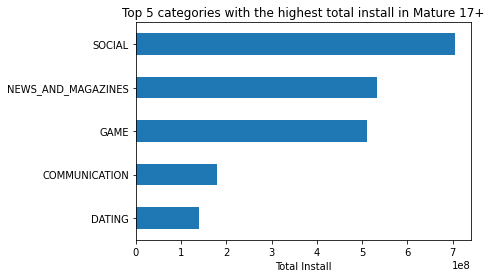

In [53]:
df.plot.barh(x='Category', y='Total Install', legend=False)
plt.title(f'Top 5 categories with the highest total install in {view_content_rating}')
plt.xlabel('Total Install')
plt.ylabel('');

Quan sát kết quả này, nếu ta muốn làm ứng dụng cho nhóm độ tuổi `Mature 17+` thì nên tập trung vào category `SOCIAL` với ứng dụng tham khảo là `VK`, hoặc là category `NEWS_AND_MAGAZINES` với ứng dụng tham khảo là `Sync for reddit`. Lưu ý là tên ứng dụng lấy ngẫu nhiên nên khi chạy lại có thể sẽ thay đổi.

## Câu hỏi 2: Với mỗi category trong 10 category nhận được nhiều review nhất, các review tích cực, trung lập và tiêu cực được phân bố như thế nào?

### Mục đích câu hỏi

Trả lời được câu hỏi này giúp chúng ta nắm được các ứng dụng trong từng category có đang phù hợp với mong muốn của người dùng hay không. Điều này hữu ích khi chúng ta là người phát triển phần mềm. Chẳng hạn nếu category nào có nhiều review tiêu cực, chúng ta có thể xây dựng một ứng dụng tương tự với ứng dụng trong category đó, nhưng khắc phục những nhược điểm trong phần review, kết quả là có cơ hội cạnh tranh và được người dùng sử dụng nhiều hơn do ứng dụng của chúng ta tốt hơn.

### Trả lời câu hỏi

**Bước 1:** Tìm 10 category có số lượng reviews cao nhất từ bảng `app_df`.

In [54]:
top_10_cat_reviews = app_df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
top_10_cat_reviews

Category
GAME               590772190
COMMUNICATION      285841611
TOOLS              229424704
SOCIAL             227936355
FAMILY             193470282
PHOTOGRAPHY        105424966
VIDEO_PLAYERS       67644444
PRODUCTIVITY        55590856
PERSONALIZATION     53543117
SHOPPING            44554067
Name: Reviews, dtype: int64

**Bước 2:** Xác định mỗi review thuộc về category nào, kết quả lưu vào dataframe `merge_df` có 2 cột `Category` và `Sentiment`.

In [55]:
merge_df = review_df.merge(app_df)[['Category', 'Sentiment']]
merge_df.sample(10)

,Category,Sentiment
6450,DATING,Positive
26140,GAME,Negative
2769,GAME,Neutral
29577,TRAVEL_AND_LOCAL,Positive
19336,BUSINESS,Negative
6138,NEWS_AND_MAGAZINES,Positive
7335,NEWS_AND_MAGAZINES,Negative
30463,SPORTS,Positive
29440,GAME,Positive
18334,PHOTOGRAPHY,Positive


**Bước 3:** Lấy ra các review thuộc 10 category có số lượng review cao nhất, lưu vào dataframe `merge_top_10_df`.

In [56]:
def in_top_10_cat_reviews(s):
    return s in top_10_cat_reviews.index

merge_top_10_df = merge_df[merge_df['Category'].apply(in_top_10_cat_reviews)]
merge_top_10_df.sample(10)

,Category,Sentiment
7787,FAMILY,Negative
22661,GAME,Positive
32751,TOOLS,Neutral
25684,PHOTOGRAPHY,Negative
9564,GAME,Positive
29184,GAME,Negative
31902,SHOPPING,Positive
13905,GAME,Negative
16344,PRODUCTIVITY,Negative
25211,FAMILY,Positive


**Bước 4:** Đếm số lượng review liên quan nhất trong mỗi category, lưu vào series `sent_count`, đặt tên series là `Total`.

In [57]:
sent_count = merge_top_10_df['Category'].value_counts().sort_index()
sent_count.name = 'Total'
sent_count

COMMUNICATION      1027
FAMILY             3205
GAME               6019
PERSONALIZATION    1003
PHOTOGRAPHY        1176
PRODUCTIVITY       1463
SHOPPING            898
SOCIAL              741
TOOLS              1451
VIDEO_PLAYERS       331
Name: Total, dtype: int64

**Bước 5:** Đếm số lượng review liên quan nhất thuộc mỗi loại (Negative, Neutral, Positive) trong mỗi category, lưu vào dataframe `cate_sent_count`.

In [58]:
cate_sent_count = merge_top_10_df.groupby(['Category','Sentiment']).size().unstack(1)
cate_sent_count

Sentiment,Negative,Neutral,Positive
Category,,,
COMMUNICATION,209,176,642
FAMILY,836,325,2044
GAME,2225,274,3520
PERSONALIZATION,146,155,702
PHOTOGRAPHY,235,160,781
PRODUCTIVITY,269,204,990
SHOPPING,177,134,587
SOCIAL,209,128,404
TOOLS,256,319,876


**Bước 6:** Gộp dataframe `cate_sent_count` và series `sent_count` thành dataframe `stat_reviews_df` có 4 cột: `Negative`, `Neutral`, `Positive`, `Total`, tính tỉ lệ review tích cực, trung lập và tiêu cực của mỗi category, lưu vào 3 cột `Positive_ratio`, `Neutral_ratio` và `Negative_ratio`.

In [59]:
stat_reviews_df = pd.concat([cate_sent_count, sent_count], axis=1)
stat_reviews_df['Positive_ratio'] = stat_reviews_df['Positive'] / stat_reviews_df['Total']
stat_reviews_df['Neutral_ratio'] = stat_reviews_df['Neutral'] / stat_reviews_df['Total']
stat_reviews_df['Negative_ratio'] = stat_reviews_df['Negative'] / stat_reviews_df['Total']
stat_reviews_df

,Negative,Neutral,Positive,Total,Positive_ratio,Neutral_ratio,Negative_ratio
COMMUNICATION,209,176,642,1027,0.625122,0.171373,0.203505
FAMILY,836,325,2044,3205,0.637754,0.101404,0.260842
GAME,2225,274,3520,6019,0.584815,0.045523,0.369663
PERSONALIZATION,146,155,702,1003,0.699900,0.154536,0.145563
PHOTOGRAPHY,235,160,781,1176,0.664116,0.136054,0.199830
PRODUCTIVITY,269,204,990,1463,0.676692,0.139440,0.183869
SHOPPING,177,134,587,898,0.653675,0.149220,0.197105
SOCIAL,209,128,404,741,0.545209,0.172740,0.282051
TOOLS,256,319,876,1451,0.603722,0.219848,0.176430
VIDEO_PLAYERS,83,58,190,331,0.574018,0.175227,0.250755


Từ dataframe trên, ta có biểu đồ phân bố tỉ lệ review liên quan nhất của 10 category nhận được nhiều review nhất:

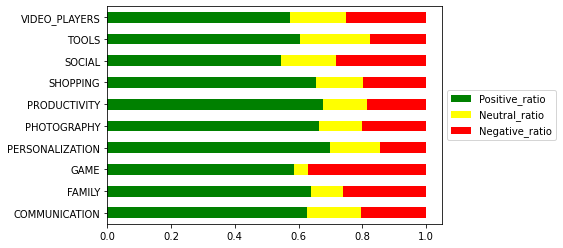

In [60]:
stat_reviews_df[['Positive_ratio', 'Neutral_ratio', 'Negative_ratio']]\
.plot.barh(stacked=True, color=["green", "yellow", "red"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Có thể thấy rằng tỉ lệ review (liên quan nhất) tích cực không có sự khác biệt quá nhiều, còn đối với tỉ lệ review (liên quan nhất) tiêu cực, tỉ lệ này cao nhất ở thể loại GAME, tiếp đến là SOCIAL, FAMILY, VIDEO_PLAYERS.<br/>
Như vậy, nếu như các nhà phát triển phần mềm có dự định xây dựng các phần mềm thuộc các thể loại có nhiều đánh giá mang tính tiêu cực như GAME, SOCIAL, FAMILY, VIDEO_PLAYERS, họ sẽ cần tìm ra những điểm yếu của những phần mềm hiện có này để khi phát triển ứng dụng cho mình sẽ hạn chế được những điểm yếu này. Từ việc trả lời câu hỏi này, nhóm nghĩ rằng có thể phân tích thêm nội dung các review bằng NLP để tìm ra được những nội dung tiêu cực được nhắc đến trong những thể loại kể trên.

# Nhìn lại quá trình làm đồ án

## Thành viên: Trần Chí Hào

### Đã gặp những khó khăn gì?

- Nhìn chung, việc thực hiện đồ án khá suôn sẻ và kịp tiến độ. Tuy nhiên em có gặp khó khăn một chút ở cách đặt câu hỏi sao cho đủ ý nghĩa và mục đích, và cách đánh giá, rút ra nhận xét từ những câu hỏi này.

### Có học được gì hữu ích?
- Qua đồ án này, em đã học được cách thực hiện một quy trình khoa học dữ liệu, cách sử dụng các thư viện Pandas, Numpy, Matplotlib trong Python và các công cụ khác để ứng dụng vào quy trình này.
- Tuy nhóm đã chọn dữ liệu có nhiều vấn để cần phải tiền xử lý khá tốn thời gian, nhưng cũng giúp em trở nên bình tĩnh hơn và cảm thấy thú vị khi dữ liệu có vẻ hơi "hỏng" một chút.
- Làm đồ án theo nhóm cũng giúp em học hỏi được góc nhìn và cách triển khai vấn đề của bạn Thắng cùng nhóm, ví dụ ở dòng dữ liệu có thiếu giá trị cột `Category` trong bảng `app_df`, cả hai đều tìm ra với cách tiếp cận khác nhau, và cách giải quyết cũng khác nhau.
- Khi được review cho nhóm khác và được nhóm khác review cho nhóm mình, em cũng đã học hỏi được cách tiếp cận vấn đề của các bạn, điều này cũng khiến em nhận ra được nhiều góc nhìn đa dạng khi thực hiện một quy trình khoa học dữ liệu.

## Thành viên: Trần Quốc Thắng

### Đã gặp những khó khăn gì?

- Khi xử lý dữ liệu của file `googleplaystore.csv`, em đã cảm thấy khá hoang mang khi gặp trường hợp một cột dữ liệu lại có chứa những giá trị đáng ra là phải nằm ở cột khác. Em đã nghi ngờ về tính chính xác khi thu thập dữ liệu của data mà nhóm sử dụng. Em còn định đề xuất cho bạn Hào sử dụng 1 data về chủ đề khác. Nhưng nhớ lời thầy Kiên là làm về dữ liệu thì phải bình tĩnh, nên em đã thử quan sát lại các dòng chứa giá trị và nhận ra ở các dòng đó, một số cột bị lệch sang trái, nghĩa là dòng đó có 1 cột không có giá trị. Do đó em chỉ cần thao tác với file CSV để tìm ra các dòng như vậy và sửa chúng, vậy là data đã được fix mà không cần phải chuyển bộ data khác.

- Việc đưa ra câu hỏi có ý nghĩa để trả lời cũng khiến em phải suy nghĩ rất nhiều về việc phải chọn câu hỏi nào vừa có thể tận dụng các giá trị trong data, vừa phù hợp với một nhu cầu thực tế nào đó. VÌ thế nên em tự đặt mình là một nhà phát triển ứng dụng, suy nghĩ xem lúc đó mình sẽ muốn biết gì từ dữ liệu, và quan sát ý nghĩa của các cột dữ liệu để đặt câu hỏi.

### Có học được gì hữu ích?

- Qua đồ án này, trước hết em học được là khi làm về khoa học dữ liệu thì phải giữ sự bình tĩnh để quan sát và suy luận. Khi gặp 1 bộ dữ liệu, có thể nó sẽ có một vài chỗ không chuẩn khiến chúng ta hoài nghi, nhưng thay vì bỏ cuộc thì tiếp tục bình tĩnh khám phá để hiểu được nguyên nhân tại sao nó lại như vậy thì sẽ tốt hơn.

- Điều thứ hai em học được là ở cách làm việc nhóm, khác với các đồ án ở môn học khác là chia ra mỗi bạn làm một phần, ở đồ án này tụi em đều cùng làm 1 phần rồi so sánh và gộp kết quả với nhau. Tuy cách này nghe có vẻ tốn nhiều thời gian hơn nhưng có ưu điểm là khi gộp lại thì em thấy được cách suy nghĩ của đồng đội, và thấy được những khía cạnh khác của bài toán mà em chưa bao giờ nghĩ đến. Điều này giúp tụi em có thể học hỏi lẫn nhau và cùng tiến bộ.

## Cả nhóm

### Nếu có thêm thời gian thì sẽ làm gì?

Nếu nhóm có nhiều thời gian hơn, nhóm sẽ:
- Tìm hiểu nhiều hơn về ý nghĩa của các khái niệm như Sentiment Polarity, Sentiment Subjectivity. 2 khái niệm này dùng trong NLP nên có thể là dùng NLP để phân tích xem trong các comment tiêu cực thì nội dung thường được nhắc đến là về vấn đề gì.
- Khai thác nhiều insight hơn qua những cột chưa được đề cập trong các câu hỏi.


# Tài liệu tham khảo

- Video các buổi học của thầy và tài liệu môn học
- [Wrong Entry for 10472 row](https://www.kaggle.com/lava18/google-play-store-apps/discussion/164101)
- [pandas.Categorical](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html)
- [mode.chained_assignment](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [Sentiment polarity, Sentiment subjectivity](https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524)
- [How to put the legend out of the plot](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)